# Analisi del Dataset Wine

In questo notebook, eseguiremo una serie di operazioni sul dataset Wine. Il nostro obiettivo è addestrare un modello di classificazione e valutare le sue performance.

## 1. Importazione delle Librerie

Importiamo le librerie necessarie per l'analisi.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


## 2. Caricamento e Standardizzazione dei Dati

Carichiamo il dataset Wine e standardizziamo le caratteristiche.


In [14]:
data = load_wine()
X = data.data
y = data.target
# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.1.  Visualizzazione dei dati in input

Convervione X e y in DataFrame per una migliore visualizzazione

In [16]:
# Converto in DataFrame per una migliore visualizzazione
df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['target'])

# prime righe del dataset
print("Prime righe del dataset:")
display(df_X.head())

print("Prime etichette del dataset:")
display(df_y.head())

# Converti i dati standardizzati in DataFrame
df_X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# prime righe dei dati standardizzati
print("Prime righe dei dati standardizzati:")
display(df_X_scaled.head())

Prime righe del dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Prime etichette del dataset:


,target
0,0
1,0
2,0
3,0
4,0


Prime righe dei dati standardizzati:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 3. Suddivisione dei Dati in Training e Test Set

Suddividiamo i dati in set di addestramento e di test.

In [17]:
# training e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# dimensioni dei set di training e test
print(f"Dimensione del training set: {X_train.shape}")
print(f"Dimensione del test set: {X_test.shape}")


Dimensione del training set: (124, 13)
Dimensione del test set: (54, 13)


## 4. Addestramento del Modello

Applichiamo l'algoritmo `DecisionTreeClassifier` per addestrare il modello.


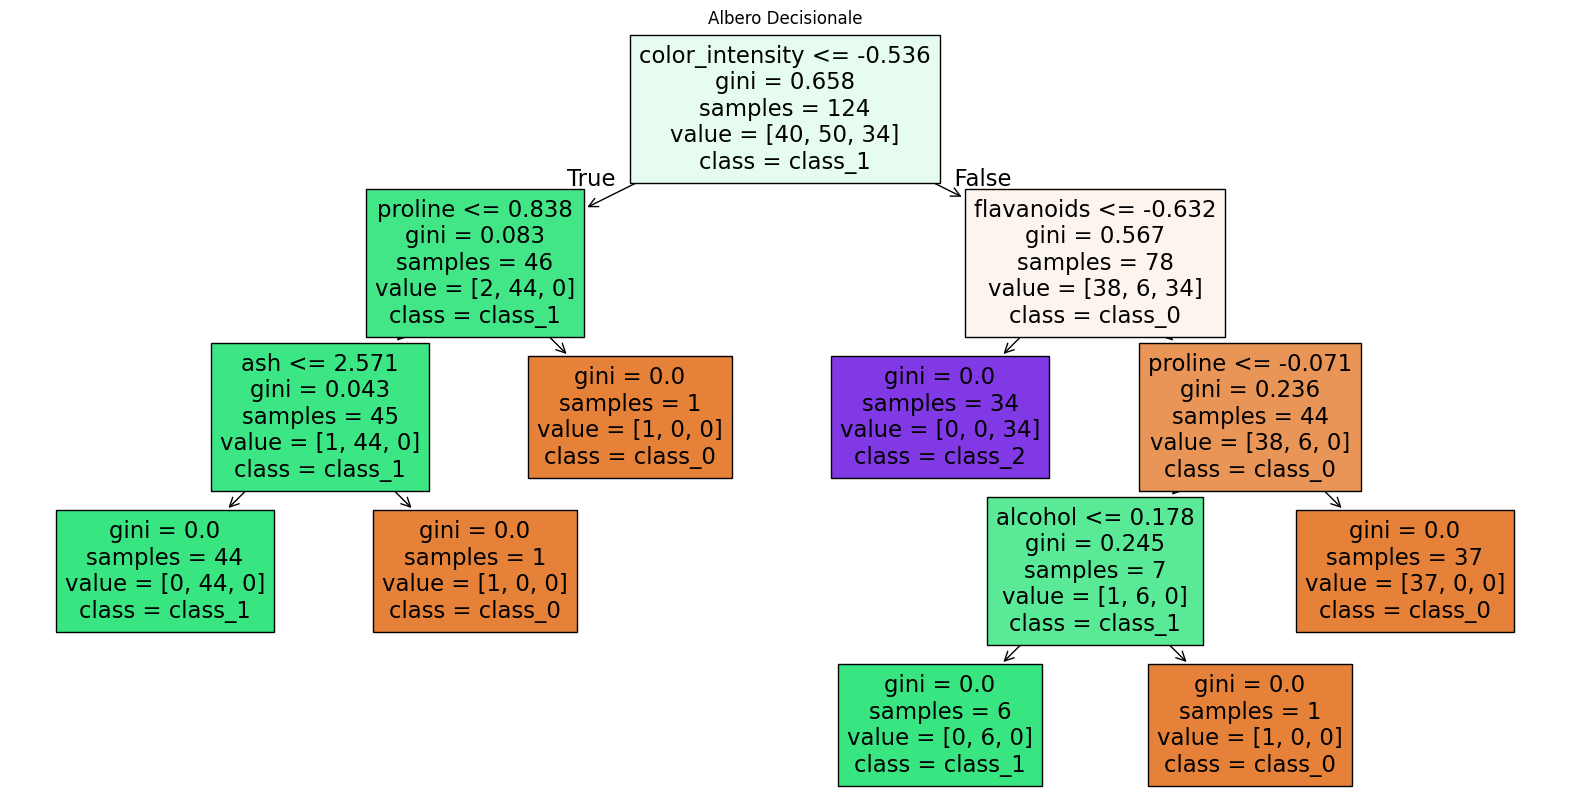

In [20]:
# addestro il modello
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

from sklearn.tree import plot_tree

# visualizzazione dell'albero
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title('Albero Decisionale')
plt.show()

## 5. Predizione sui Dati di Test

Effettuiamo delle predizioni sui dati di test.


In [22]:
# Effettua le predizioni sul test set
y_pred = clf.predict(X_test)

# Crea un DataFrame per le etichette vere e le predizioni
df_predictions = pd.DataFrame({'Classi Reali': y_test,'Classi predette': y_pred})

# Mostra le prime righe del DataFrame delle predizioni
print("Prime righe delle predizioni:")
display(df_predictions.head())

Prime righe delle predizioni:


,Classi Reali,Classi predette
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1


## 6. Valutazione del Modello

Valutiamo la performance del modello utilizzando `classification_report`.


In [23]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



## 7. Visualizzazione della Matrice di Confusione

Generiamo e visualizziamo la matrice di confusione.


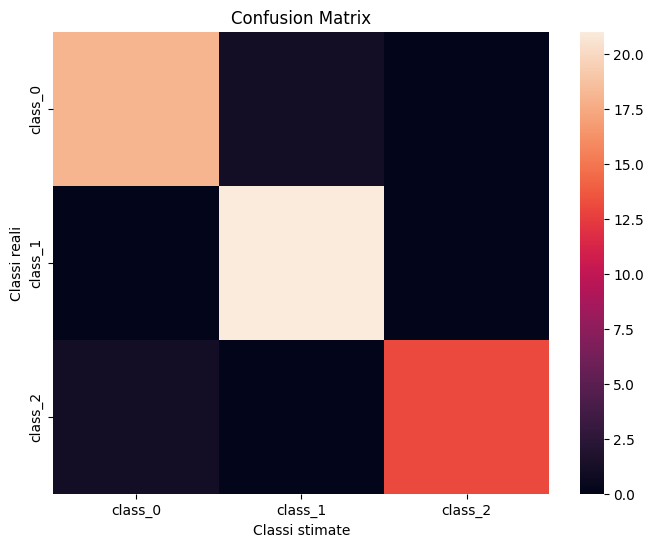

In [24]:
# matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# heatmap della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Classi stimate')
plt.ylabel('Classi reali')
plt.title('Confusion Matrix')
plt.show()